<a href="https://www.kaggle.com/code/olgaeleftherakou/simple-linear-regression-without-libraries?scriptVersionId=189595662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.20,39344.00
1,1,1.40,46206.00
2,2,1.60,37732.00
3,3,2.10,43526.00
4,4,2.30,39892.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.00,30.00
mean,5.41,76004.00
std,2.84,27414.43
min,1.20,37732.00
25%,3.30,56721.75
50%,4.80,65238.00
75%,7.80,100545.75
max,10.60,122392.00


In [6]:
fig = px.scatter(df, x='YearsExperience', y='Salary', size='Salary', trendline="ols")

fig.update_layout(
    title={
        'text': 'Years of Experience vs Salary',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Years of Experience'
)

fig.update_traces(marker=dict(color='green'))

fig.show()

#### 🔎 ***Linear regression***: It is a statistical method used to understand and predict the relationship between two variables: one independent (or explanatory) variable and one dependent (or response) variable.

#### 🔎 ***Dependent Variable (Y)***: This is the outcome we are trying to predict. It is the variable, as the term implies, that depends on another variable. In our case, this is the salary.

#### 🔎 ***Independent Variable (X)***: This is the variable that helps us predict the dependent variable because we believe it has an impact. In our case, this is the years of experience.

In [7]:
x = df.YearsExperience
y = df.Salary

random.seed(2)

# Randomly shuffle the data indices
indices = list(range(len(x)))
random.shuffle(indices)
print(f"Indices: {indices}")

# Define split ratio
train_ratio = 0.8
train_size = int(train_ratio * len(x))

# Split indices into train and test sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]
print(f"Train Indices: {train_indices}")
print(f"Test Indices: {test_indices}")

# Create training sets
x_train = [x[i] for i in train_indices]
y_train = [y[i] for i in train_indices]
print(f"x train: {x_train}")
print(f"y train: {y_train}")

# Create test sets
x_test = [x[i] for i in test_indices]
y_test = [y[i] for i in test_indices]
print(f"x test: {x_test}")
print(f"y test: {y_test}")

Indices: [3, 22, 17, 15, 0, 25, 4, 7, 14, 16, 20, 24, 12, 18, 10, 13, 23, 28, 6, 19, 8, 9, 21, 5, 11, 26, 2, 1, 29, 27]
Train Indices: [3, 22, 17, 15, 0, 25, 4, 7, 14, 16, 20, 24, 12, 18, 10, 13, 23, 28, 6, 19, 8, 9, 21, 5]
Test Indices: [11, 26, 2, 1, 29, 27]
x train: [2.1, 8.0, 5.4, 5.0, 1.2000000000000002, 9.1, 2.3000000000000003, 3.3000000000000003, 4.6, 5.199999999999999, 6.9, 8.799999999999999, 4.1, 6.0, 4.0, 4.199999999999999, 8.299999999999999, 10.4, 3.1, 6.1, 3.3000000000000003, 3.8, 7.199999999999999, 3.0]
y train: [43526.0, 101303.0, 83089.0, 67939.0, 39344.0, 105583.0, 39892.0, 54446.0, 61112.0, 66030.0, 91739.0, 109432.0, 56958.0, 81364.0, 63219.0, 57082.0, 113813.0, 122392.0, 60151.0, 93941.0, 64446.0, 57190.0, 98274.0, 56643.0]
x test: [4.1, 9.6, 1.6, 1.4, 10.6, 9.7]
y test: [55795.0, 116970.0, 37732.0, 46206.0, 121873.0, 112636.0]


In [8]:
mean_x_train = sum(x_train) / len(x_train)
mean_x_test = sum(x_test) / len(x_test)

mean_y_train = sum(y_train) / len(y_train)
mean_y_test = sum(y_test) / len(y_test)

#### 🔎 ***Slope (b1)***: This tells us how much the dependent variable (Y) changes when the independent variable (X) increases by one unit. A positive slope means Y increases as X increases, and a negative slope means Y decreases as X increases.

#### 🔎 ***Intercept (b0)***: This is the value of the dependent variable (Y) when the independent variable (X) is zero. It represents the starting point of the line on the Y-axis. In our case, this point tells ud what the salary might be if we have zero years of experience. It giving us a baseline or starting point for the predictions.

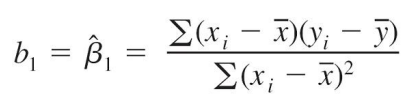

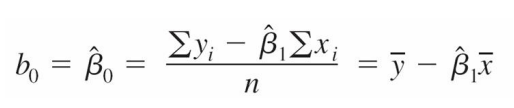

In [9]:
# Slope
b1 = sum((x_train[i] - mean_x_train) * (y_train[i] - mean_y_train) for i in range(len(x_train))) / sum((x_train[i] - mean_x_train)**2 for i in range(len(x_train)))

# Intercept
b0 = mean_y_train - (b1 * mean_x_train)

#### 🔎 ***Best-Fit Line***: Imagine you have a bunch of points on a graph, like dots on a piece of paper. Each dot represents a pair of related things, like how much years of experience you have and what salary you get. Best-fit line is like drawing a straight line that goes through the middle of these dots in such a way that the line is as close as possible to all the dots.

#### The reason we do this is beacause we want to see the general trend or pattern in the data. The best-fit line helps us understand if there's a relationship between the two things we're looking at.

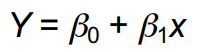

In [10]:
y_pred_train = [b0 + (b1 * x_train[i]) for i in range(len(x_train))]
y_pred_test = [b0 + (b1 * x_test[i]) for i in range(len(x_test))]

#### 🔎 ***SST (Total Sum of Squares)***: It measures the total amount of variation in our data. It tells us how much the data points (e.g., salary) spread out around their average value. SST is like measuring how far each salary is from the average salary and adding up all those distances. It’s a way to understand the total spread or variability of the salary.

#### 🔎 ***SSR (Regression Sum of Squares)***: It measures how much of the total variation (SST) is explained by our model (the best-fit line). In our case, we use a line to predict salary based on years of experience. SSR is like measuring how much of the spread in salary is explained by this line. It’s a way to see if the line we’ve drawn actually helps in understanding the salary.

#### 🔎 ***SSE (Residual Sum of Squares)***: It measures the discrepancy between the actual observed values and the values predicted by the model. The SSE tells us how well our model’s predictions match the actual data. A smaller SSE indicates a model that predicts the data more accurately, while a larger SSE indicates more significant discrepancies between the model's predictions and the actual values.

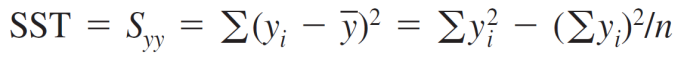

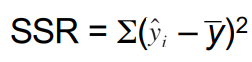

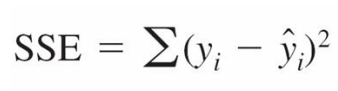

In [11]:
sst_test = sum((y_test[i] - mean_y_test)**2 for i in range(len(y_test)))
ssr_test = sum((y_pred_test[i] - mean_y_test)**2 for i in range(len(y_pred_test)))
sse_test = sum((y_test[i] - y_pred_test[i])**2 for i in range(len(y_pred_test)))

sst_train = sum((y_train[i] - mean_y_train)**2 for i in range(len(y_train)))
ssr_train = sum((y_pred_train[i] - mean_y_train)**2 for i in range(len(y_pred_train)))
sse_train = sum((y_train[i] - y_pred_train[i])**2 for i in range(len(y_pred_train)))

#### 🔎 ***R-Squared***: The percentage of the total variation that our model explains. It tells us how good our model is at making predictions. So, if R-squared is high, it means that our model (line) does a good job of explaining the variation in our data. If it's low, the model doesn't explain much of the variation, and there might be other factors influencing the data.

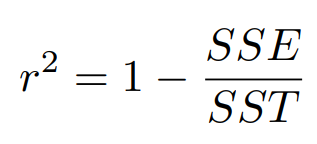

In [12]:
r_squared_test = 1 - (sse_test/sst_test)
r_squared_train = 1 - (sse_train/sst_train)

In [13]:
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1} \n")
print(f"R-squared Test: {r_squared_test}")
print(f"R-squared Train: {r_squared_train} \n")
print(f"Predicted y test: {y_pred_test}")
print(f"Predicted y train: {y_pred_train}")

Intercept (b0): 23553.611191904507
Slope (b1): 9757.745864388293 

R-squared Test: 0.9739006375719813
R-squared Train: 0.9448715311621808 

Predicted y test: [63560.369235896505, 117227.97149003211, 39166.00457492578, 37214.455402048116, 126985.71735442041, 118203.74607647094]
Predicted y train: [44044.87750711992, 101615.57810701085, 76245.4388596013, 72342.34051384596, 35262.90622917046, 112349.09855783796, 45996.42667999759, 55754.172544385874, 68439.24216809066, 74293.88968672362, 90882.05765618374, 109421.77479852147, 63560.369235896505, 82100.08637823426, 62584.59464945768, 64536.14382233533, 104542.90186632733, 125034.16818154276, 53802.62337150822, 83075.86096467309, 55754.172544385874, 60633.04547658002, 93809.3814155002, 52826.848785069385]


#### 🔎 ***Intercept (b0)***: The starting salary when experience is zero, is 23553.61119190453
#### 🔎 ***Slope (b1)***: The increase in salary per year of experience, is 9757.74586438829

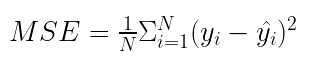
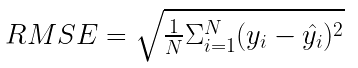
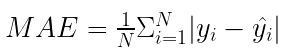
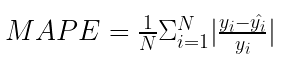

#### 🔎 ***Mean Squared Error (MSE)***: It measures how much the predicted values differ from the actual values by squaring the differences. It tells us, on average, how far off our predictions are from the actual values, but it gives more weight to larger errors because it squares them.
#### 🔎 ***Root Mean Squared Error (RMSE)***: It is simply the square root of the MSE.
#### 🔎 ***Mean Absolute Error (MAE)***: It measures the average of the absolute differences between the predicted values and the actual values. It tells us, on average, how far off our predictions are from the actual values without giving extra weight to larger errors.
#### 🔎 ***Mean Absolute Percentage Error (MAPE)***: It measures the average percentage difference between the predicted values and the actual values.

In [14]:
# Create a DataFrame for the test set actual vs. predicted values
test_results = pd.DataFrame({
    'YearsExperience (x)': x_test,
    'Actual Salary (Y)': y_test,
    'Predicted Salary (Yhat)': y_pred_test
})

test_results['Residual'] = test_results['Actual Salary (Y)'] - test_results['Predicted Salary (Yhat)']
test_results['Absolute Error'] = abs(test_results['Residual'])
test_results['Squared Error'] = (test_results['Residual'])**2
test_results['Absolute Percentage Error'] = (test_results['Absolute Error'] / test_results['Actual Salary (Y)']) * 100

mse_test = test_results['Squared Error'].mean()
rmse_test = mse_test**(1/2)
mae_test = test_results['Absolute Error'].mean()
mape_test = test_results['Absolute Percentage Error'].mean()

# Create a DataFrame for the train set actual vs. predicted values
train_results = pd.DataFrame({
    'YearsExperience (x)': x_train,
    'Actual Salary (Y)': y_train,
    'Predicted Salary (Yhat)': y_pred_train
})

train_results['Residual'] = train_results['Actual Salary (Y)'] - train_results['Predicted Salary (Yhat)']
train_results['Absolute Error'] = abs(train_results['Residual'])
train_results['Squared Error'] = (train_results['Residual'])**2
train_results['Absolute Percentage Error'] = (train_results['Absolute Error'] / train_results['Actual Salary (Y)']) * 100

mse_train = train_results['Squared Error'].mean()
rmse_train = mse_train**(1/2)
mae_train = train_results['Absolute Error'].mean()
mape_train = train_results['Absolute Percentage Error'].mean()

print("Training Results: \n")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}% \n")
display(train_results)

print("\nTest Results: \n")
print("Training Results: \n")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}% \n")
display(test_results)

Training Results: 

Mean Squared Error (MSE): 31832634.61
Root Mean Squared Error (RMSE): 5642.04
Mean Absolute Error (MAE): 4656.87
Mean Absolute Percentage Error (MAPE): 6.91% 



,YearsExperience (x),Actual Salary (Y),Predicted Salary (Yhat),Residual,Absolute Error,Squared Error,Absolute Percentage Error
0,2.10,43526.00,44044.88,-518.88,518.88,269233.87,1.19
1,8.00,101303.00,101615.58,-312.58,312.58,97705.07,0.31
2,5.40,83089.00,76245.44,6843.56,6843.56,46834329.08,8.24
3,5.00,67939.00,72342.34,-4403.34,4403.34,19389407.68,6.48
4,1.20,39344.00,35262.91,4081.09,4081.09,16655326.37,10.37
5,9.10,105583.00,112349.10,-6766.10,6766.10,45780089.69,6.41
6,2.30,39892.00,45996.43,-6104.43,6104.43,37264025.09,15.30
7,3.30,54446.00,55754.17,-1308.17,1308.17,1711315.41,2.40
8,4.60,61112.00,68439.24,-7327.24,7327.24,53688477.79,11.99
9,5.20,66030.00,74293.89,-8263.89,8263.89,68291872.75,12.52



Test Results: 

Training Results: 

Mean Squared Error (MSE): 33401904.53
Root Mean Squared Error (RMSE): 5779.44
Mean Absolute Error (MAE): 4854.89
Mean Absolute Percentage Error (MAPE): 7.76% 



,YearsExperience (x),Actual Salary (Y),Predicted Salary (Yhat),Residual,Absolute Error,Squared Error,Absolute Percentage Error
0,4.10,55795.00,63560.37,-7765.37,7765.37,60300959.37,13.92
1,9.60,116970.00,117227.97,-257.97,257.97,66549.29,0.22
2,1.60,37732.00,39166.00,-1434.00,1434.00,2056369.12,3.80
3,1.40,46206.00,37214.46,8991.54,8991.54,80847874.26,19.46
4,10.60,121873.00,126985.72,-5112.72,5112.72,26139878.75,4.20
5,9.70,112636.00,118203.75,-5567.75,5567.75,30999796.37,4.94


In [15]:
# Create a Plotly scatter plot of residuals
fig = go.Figure()

# Scatter plot of residuals vs. predicted values
fig.add_trace(go.Scatter(
    x=test_results['Predicted Salary (Yhat)'],
    y=test_results['Residual'],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Residuals'
))

# Add horizontal line at y=0
fig.add_trace(go.Scatter(
    x=[min(test_results['Predicted Salary (Yhat)']), max(test_results['Predicted Salary (Yhat)'])],
    y=[0, 0],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Zero Residual Line'
))

# Layout settings
fig.update_layout(
    title='Residuals vs. Predicted Values (Test)',
    xaxis=dict(title='Predicted Salary'),
    yaxis=dict(title='Residual'),
    showlegend=True
)

pio.show(fig)

In [16]:
# Create a Plotly scatter plot of residuals
fig = go.Figure()

# Scatter plot of residuals vs. predicted values
fig.add_trace(go.Scatter(
    x=train_results['Predicted Salary (Yhat)'],
    y=train_results['Residual'],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Residuals'
))

# Add horizontal line at y=0
fig.add_trace(go.Scatter(
    x=[min(train_results['Predicted Salary (Yhat)']), max(train_results['Predicted Salary (Yhat)'])],
    y=[0, 0],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Zero Residual Line'
))

# Layout settings
fig.update_layout(
    title='Residuals vs. Predicted Values (Train)',
    xaxis=dict(title='Predicted Salary'),
    yaxis=dict(title='Residual'),
    showlegend=True
)

pio.show(fig)

In [17]:
fig = go.Figure()

# Add scatter plot for actual vs predicted on the training set
fig.add_trace(go.Scatter(
    x=x_train, 
    y=y_train, 
    mode='markers', 
    name='Actual Train',
    marker=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=x_train, 
    y=y_pred_train, 
    mode='lines', 
    name='Predicted Train',
    line=dict(color='blue', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Years of Experience',
    yaxis_title='Salary',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

In [18]:
fig = go.Figure()

# Add scatter plot for actual vs predicted on the test set
fig.add_trace(go.Scatter(
    x=x_test, 
    y=y_test, 
    mode='markers', 
    name='Actual Test',
    marker=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=x_test, 
    y=y_pred_test, 
    mode='lines', 
    name='Predicted Test',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Years of Experience',
    yaxis_title='Salary',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()